In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [158]:
df=pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [159]:
df.shape

(13320, 9)

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [161]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [162]:
len(df.area_type.unique()),len(df.availability.unique()),len(df.location.unique()),len(df['size'].unique()),len(df.society.unique())

(4, 81, 1306, 32, 2689)

In [163]:
df1=df.fillna(value=0)
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,0,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,0,1200,2.0,1.0,51.00


In [164]:
df.total_sqft=pd.Series(np.array(df.total_sqft,dtype=np.uint8))

ValueError: invalid literal for int() with base 10: '2100 - 2850'

In [165]:
# for i in range(df.shape[0]):
#     if (len(str(df.total_sqft[i]))>7):
#         print(i)
#         n1=int(df.total_sqft[i][:4])
#         n2=int(df.total_sqft[i][7:])
#         df.total_sqft[i]=(n1+n2)/2

In [166]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [167]:
df[~df['total_sqft'].apply(is_float)]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,LedorSa,2100 - 2850,4.0,0.0,186.000
56,Built-up Area,20-Feb,Devanahalli,4 Bedroom,BrereAt,3010 - 3410,NaN,NaN,192.000
81,Built-up Area,18-Oct,Hennur Road,4 Bedroom,Gollela,2957 - 3450,NaN,NaN,224.500
122,Super built-up Area,18-Mar,Hebbal,4 BHK,SNontle,3067 - 8156,4.0,0.0,477.000
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,Vaarech,1042 - 1105,2.0,0.0,54.005
...,...,...,...,...,...,...,...,...,...
12990,Super built-up Area,18-May,Talaghattapura,3 BHK,Sodgere,1804 - 2273,3.0,0.0,122.000
13059,Super built-up Area,Ready To Move,Harlur,2 BHK,Shodsir,1200 - 1470,2.0,0.0,72.760
13240,Super built-up Area,Ready To Move,Devanahalli,1 BHK,Pardsri,1020 - 1130,NaN,NaN,52.570
13265,Super built-up Area,20-Sep,Hoodi,2 BHK,Ranuetz,1133 - 1384,2.0,0.0,59.135


In [168]:
def conv(x):
    tokens=x.split('-')
    if (len(tokens)==2):
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [169]:
df['total_sqft']=df['total_sqft'].apply(conv)

In [170]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft        46
bath              73
balcony          609
price              0
dtype: int64

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13274 non-null  float64
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(4), object(5)
memory usage: 936.7+ KB


In [172]:
df.drop(columns=['society'],inplace=True)

In [173]:
df.describe()

,total_sqft,bath,balcony,price
count,13274.000000,13247.000000,12711.000000,13320.000000
mean,1559.626694,2.692610,1.584376,112.565627
std,1238.405258,1.341458,0.817263,148.971674
min,1.000000,1.000000,0.000000,8.000000
25%,1100.000000,2.000000,1.000000,50.000000
50%,1276.000000,2.000000,2.000000,72.000000
75%,1680.000000,3.000000,2.000000,120.000000
max,52272.000000,40.000000,3.000000,3600.000000


In [192]:
df['location'].replace(np.nan,df.location.mode()[0],inplace=True)
df['size'].replace(np.nan,df['size'].mode()[0],inplace=True)
df['total_sqft'].replace(np.nan,df['total_sqft'].mean(),inplace=True)
df['balcony'].replace(np.nan,df['balcony'].mean(),inplace=True)
df['bath'].replace(np.nan,df['bath'].mean(),inplace=True)

In [193]:
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [196]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['location']=le.fit_transform(df['location'])
df['size']=le.fit_transform(df['size'])
df['availability']=le.fit_transform(df['availability'])

In [197]:
df['area_type']=pd.get_dummies(df['area_type'],drop_first=True)

ValueError: Columns must be same length as key

In [202]:
df=pd.get_dummies(df,columns=['area_type'],drop_first=True)

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   availability                    13320 non-null  int32  
 1   location                        13320 non-null  int64  
 2   size                            13320 non-null  int32  
 3   total_sqft                      13320 non-null  float64
 4   bath                            13320 non-null  float64
 5   balcony                         13320 non-null  float64
 6   price                           13320 non-null  float64
 7   area_type_Carpet  Area          13320 non-null  uint8  
 8   area_type_Plot  Area            13320 non-null  uint8  
 9   area_type_Super built-up  Area  13320 non-null  uint8  
dtypes: float64(4), int32(2), int64(1), uint8(3)
memory usage: 663.5 KB


<AxesSubplot:>

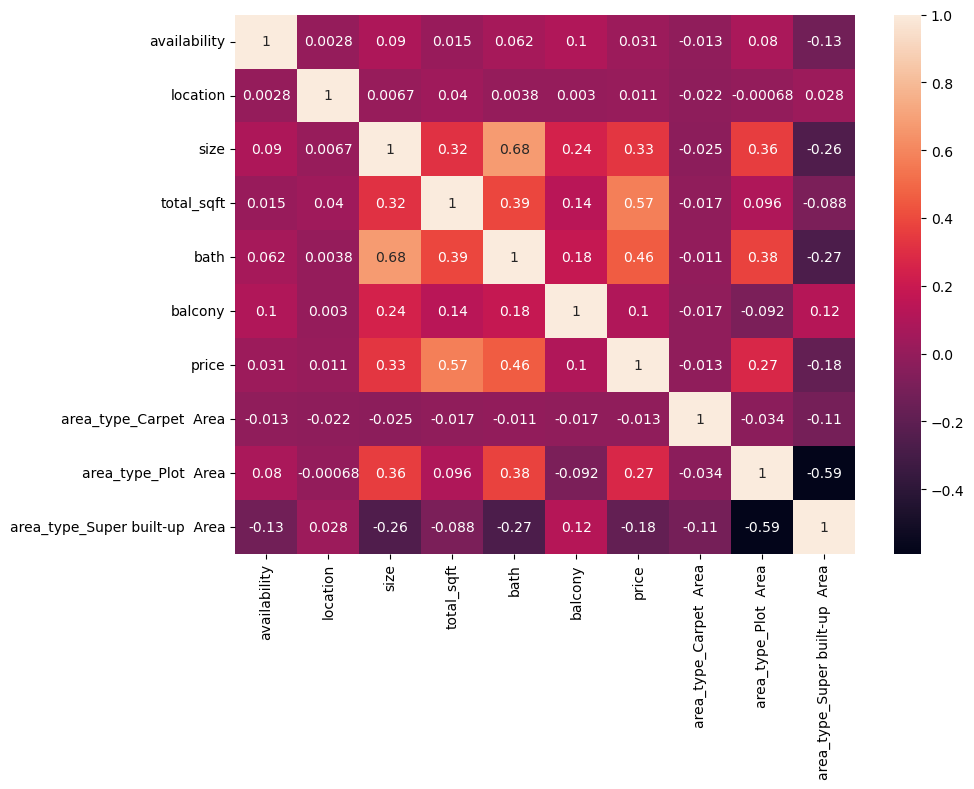

In [205]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)

In [209]:
x=df.drop(columns=['price'])
y=df['price']

In [210]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [269]:
def cost(x,y,w,b):
    y_hat=w.T@x.T+b
    return (np.mean((y-y_hat)**2,axis=1))/(2)

In [272]:
w=np.ones((x_train.shape[1],1))
b=1
y=np.array(y).reshape(-1,1)
cost(x_train,y_train,w,b)

0    3.305307e+06
dtype: float64

In [255]:
alpha=0.01
iterations=1000
for i in range(iterations):
    

(13320, 1)